# Lab 4 - Multivariate Linear Discrete-time Deterministic (MLDD) models

Author: Elizabeth O'Meara

Adapted from a lab written by: Ben Bolker and Steve Walker

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Annual Plant Model

In lecture, your instructor introduced the annual plant model for $P_N$, the plant population in year $N$. The original model depended on $P_{N-1}$ and $P_{N-2}$, the plant population in the two previous years, since this plant's seeds are viable for at most two years. In lecture, you transformed this univarite model with multiple lags (based on the plant population in several years) into a multivariate linear discrete-time deterministic (MLDD) model using the change of variables $S_N = P_{N-1}$. The MLDD model can be described by the  matrix equation

$$
\begin{equation}
\begin{bmatrix} P \\ S \end{bmatrix}_{N} = \begin{bmatrix} \gamma\alpha\sigma & \gamma\sigma^2(1-\alpha)\beta \\ 1 & 0 \end{bmatrix} \begin{bmatrix} P \\ S \end{bmatrix}_{N-1}
\end{equation}
$$

where $\gamma$ is the number of seeds produced per plant per year, $\sigma$ is the proportion of seeds that survive the winter, $\alpha$ is the 1st year germination proportion, and $\beta$ is the 2nd year germination proportion. You will notice that this equation is of the form, $ \vec{x_N} = M\vec{x_{N-1}}$, which is the general matrix equation for MLDD models.

### Simualting the Annual Plant Model

If we want to simulate solutions to this model, we will need to know how to write matrices in python. This can be accomplished using the `np.array()` function. For example, we can create a matrix with 1 through 3 in the first row and 4 through 6 in the second row using the code below.

In [2]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)

[[1 2 3]
 [4 5 6]]


If we wish to access a specific element of our matrix, we can do so using the following code. In the example we are extracting the value in the 2nd row, 3rd column. **Note**: Remember that python's index begins at 0. So if you want the 1st row, its index is 0.

In [3]:
r2_c3 = A[1][2]

print(r2_c3)

6


Next, if we wish to perform matrix multiplication, we must use the `np.dot()` function.

In [4]:
B = np.array([[1, 2], [3, 4], [5, 6]])
C = A.dot(B)
print(C)

[[22 28]
 [49 64]]


Finally, we can find the transpose of a matrix using the `np.transpose()` function. This is also useful if you need to turn a row vector into a column vector or vice versa.

In [5]:
D = A.transpose()
print(D)

[[1 4]
 [2 5]
 [3 6]]


In [6]:
e = np.array([[1, 2, 3]])
f = A.dot(e.transpose())
print(f)

[[14]
 [32]]


**Exercise 1**: Define a function that simulates the annual plant model. Your function should take the arguments $P_0$, $S_0$, $\gamma$, $\sigma$, $\alpha$, $\beta$, and the total number of time steps $T$ (not counting $N = 0$). Make sure the output of your function is a data frame containing $N$ and $P_N$.

Confidence check: with $P_0=20$, $S_0=25$, $\gamma=4$, $\sigma=0.5$, $\alpha=0.3$, $\beta=0.65$, and $T=20$, $P_{20}=$ 46.10839616.

*Hint: you can create an array of zeros using* `np.zeros((r, c))` *where r is the number of rows and c is the number of columns*

In [7]:
def annual_plant(P0=20, S0=25, gamma=4, sigma=0.5, alpha=0.3, beta=0.65, T=20):
    N = np.arange(T+1)
    x = np.zeros((2, T+1))
    x[:,0] = np.array([[P0, S0]])
    M = np.array([[gamma*sigma*alpha, gamma*(sigma**2)*(1 - alpha)*beta], [1, 0]])
    
    for i in N[1:T+1]:
        x[:,i] = M.dot(x[:,i-1])
    
    df = pd.DataFrame({
        'N': N,
        'P': x[0]
    })
    
    return df
    
df = annual_plant()
print(df)

     N          P
0    0  20.000000
1    1  23.375000
2    2  23.125000
3    3  24.510625
4    4  25.228250
5    5  26.289284
6    6  27.252424
7    7  28.313079
8    8  29.387700
9    9  30.515071
10  10  31.680446
11  11  32.892625
12  12  34.150178
13  13  35.456252
14  14  36.812082
15  15  38.219844
16  16  39.681404
17  17  41.198871
18  18  42.774361
19  19  44.410103
20  20  46.108396


**Exercise 2**: Using the function you created in exercise 1, using all the same parameter values and initial conditions, simulate the model for the following values of $\gamma$: 1, 2, 3, and 4.
    
Plot the simulated values of $P$ for all values of $\gamma$ on the same plot using `seaborn`.

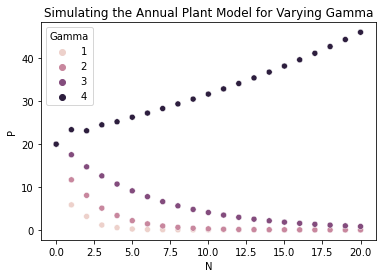

In [8]:
case_1 = annual_plant(gamma=1)
case_2 = annual_plant(gamma=2)
case_3 = annual_plant(gamma=3)
case_4 = annual_plant()

N = np.arange(21)

case_1['Gamma'] = 1
case_2['Gamma'] = 2
case_3['Gamma'] = 3
case_4['Gamma'] = 4

df = pd.concat([case_1, case_2, case_3, case_4], axis=0, ignore_index=True)

sns.scatterplot(data=df, x='N', y='P', hue='Gamma')
plt.title('Simulating the Annual Plant Model for Varying Gamma');

### Closed Form Solution

In class, your instructor derived the closed form solution of this model, which is

$$
\begin{equation}
\vec{x_N} = M^N\vec{x_0}
\end{equation}
$$

and showed that if $M$ is diagonalizable, the closed form solution can instead be written as

$$
\begin{equation}
\vec{x_N} = VD^NV^{-1}\vec{x_0}
\end{equation}
$$

where $D$ is a diagonal matrix (with entries as the eigenvalues of $M$) and $V$ is a matrix containing the eigenvectors of $M$ (in the same order as the eigenvalues appear in $D$).

If we want to define a function that calculates $\vec{x_N}$ for each value of $N$, we need to know how to find the eigenvalues and eigenvectors of $M$ and how to find the inverse of a matrix, in Python. First, to find the eigenvalues and eigenvectors, we use the function `np.linalg.eig`. For simplicity we import `np.linalg` as `linalg`. This function outputs a vector containing eigenvalues repeated based on their multiplicity and the matrix of eigenvectors.

In [9]:
import numpy.linalg as linalg

A = np.array([[1, 2], [3, 4]])

eig, V = linalg.eig(A)

print(eig)
print(V)


[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


We can create a matrix with the eigenvalues along the diagonal using the `np.fill_diagonal()` function, where the first argument is an array that you want to change the diagonal entries of, and the second is either a scalar or an array-like object that tells the function what values to put on the diagonal.

In [10]:
D = np.zeros((2,2))
np.fill_diagonal(D, eig)

print(D)

[[-0.37228132  0.        ]
 [ 0.          5.37228132]]


Finally, we find the inverse of a matrix using the `linalg.inv()` function.

In [11]:
V_inv = linalg.inv(V)

Now we can check that $SDS^{-1}=A$ to ensure nothing went wrong.

In [12]:
B = V.dot(D.dot(V_inv))
print(B)

[[1. 2.]
 [3. 4.]]


**Exercise 3**: Define a function that calculates the closed form solution for given time steps $N$. Your function should take the arguments $P_0$, $S_0$, $\gamma$, $\sigma$, $\alpha$, $\beta$, and the total number of time steps $T$ (not counting $N = 0$). Make sure the output of your function is a data frame containing $N$ and $P_N$. Also have the function output the matrix $M$ and its eigenvalues, this will help in a later exercise. Check that the results of your closed form solution match that of your discrete-time model simulations for the same given parameters: $P_0=20$, $S_0=25$, $\gamma=4$, $\sigma=0.5$, $\alpha=0.3$, $\beta=0.65$, and $T=20$.

*Hint: you can raise a matrix to the power of a value using the* `linalg.matrix_power(a, b)` *function where `a` is the matrix and `b` is the power*

In [13]:
def cf_plant_mod(P0=20, S0=25, gamma=4, sigma=0.5, alpha=0.3, beta=0.65, T=20):
    N = np.arange(T + 1)
    x = np.zeros((3, T + 1))
    x[0] = N
    init_vals = np.array([[P0, S0]])

    M = np.array([[gamma*sigma*alpha, gamma*(sigma**2)*(1 - alpha)*beta], [1, 0]])
    eig, P = linalg.eig(M)

    P_inv = linalg.inv(P)
    D = np.zeros((len(eig),len(eig)))
    np.fill_diagonal(D, eig)
                
    
    for t in N:
        x[(1,2),t] = P.dot(linalg.matrix_power(D, t).dot(P_inv)).dot(init_vals.transpose()).transpose()
    
    df = pd.DataFrame({
        'N': x[0],
        'P': x[1]
    })
    
    return df, eig, M
    
df, eig, M = cf_plant_mod()    

**Exercise 4**: Create a plot comparing the closed form solution to the simulation of the discrete model for the same parameters as in exercise 1. Do they agree?

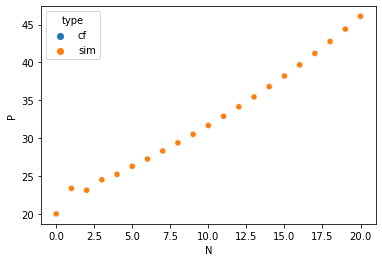

In [14]:
df, eig, M = cf_plant_mod()
df['type'] = 'cf'
df_cf = df
df_sim = case_4
df_sim['type'] = 'sim'

df_final = pd.concat([df_cf, df_sim], axis=0, ignore_index=True)

sns.scatterplot(data=df_final, x='N', y='P', hue='type');

### Finding the Fixed Point

In lecture, your instructor described how to find the fixed point of the model. Where $\vec{x^*}$ is a fixed point if $\vec{x^*}=M\vec{x^*}$, ie. $(I-M)\vec{x^*}=0$. If $(I-M)$ is invertible, then $\vec{x^*} = 0$ is the only fixed point. Otherwise, there is an $n-r$ dimensional nullspace, where $n$ is the dimension of $(I-M)$ and $r$ is the rank. By definition, $(I-M)$ is invertible if $\text{det}(I-M)\neq 0$. We can find the determinant of a matrix in python using the `linalg.det()`. We can also create the identity matrix using the function `numpy.identity()` where you provide a scalar describing the number of rows/columns. See following example:

In [15]:
I = np.identity(2)
M = np.array([[1, 2], [3, 4]])
A = I - M
print(linalg.det(A))

-6.0


In the example, since $\text{det}(I-M)\neq 0$, $\vec{x^*} = 0$ is the only fixed point of the system $\vec{x_N} = M\vec{x_{N-1}}$.

**Exercise 5**: Using the default parameters given in exercise 3, is  $\vec{x^*} = 0$ the only fixed point of the model? Why or why not?

In [16]:
df, eig, M = cf_plant_mod()
I = np.identity(len(M))
A = I - M
print(linalg.det(A) != 0)

True


### Determining the Stability of the Fixed Point

To determine the stability of the fixed point, we will use the eigenvalues of the matrix $M$. If all of the eigenvalues have an absolute value (or modulus if they are complex) less than 1, then the fixed point, $\vec{x^*} = 0$, is stable. Otherwise, the fixed point is unstable.

In [17]:
eig, P = linalg.eig(M)
print(eig)
np.abs(eig) < 1

[ 1.03824115 -0.43824115]


array([False,  True])

In the example above, since only one eigenvalue has an absolute value less than 1, the fixed point is unstable.

**Exercise 6**: Using the same parameters as used in Exercise 5, determine the stability of the fixed point. Does this result agree with the plot you created in exercise 4?

In [18]:
df, eig, M = cf_plant_mod()
print(np.abs(eig) < 1)

[False  True]
